In [105]:
from pymongo import MongoClient
import numpy as np
import base64
from cpsdriver.codec import DocObjectCodec
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime as dt

In [106]:
try:
    client = MongoClient('localhost:27017')
except pymongo.errors.ConnectionFailure as e:
    print(e)

In [107]:
client.database_names()

c:\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: database_names is deprecated. Use list_database_names instead.
  """Entry point for launching an IPython kernel.


['admin', 'config', 'cps-test-01', 'local']

In [108]:
# use database

db = client['cps-test-01']

In [109]:
# explore plate_data           

plate_data = db['plate_data']
print (plate_data.count())
item = plate_data.find_one()
# print(item)

sample = [None,None,None,None,None,None]

for item in plate_data.find():
    gondola_id = item['gondola_id']
    
    plate_data_item = DocObjectCodec.decode(doc=item, collection='plate_data')
    date_time = item['date_time']
    timestamp = plate_data_item.timestamp # seconds since epoch
    np_data = plate_data_item.data
    sample[gondola_id] = np_data
    print('gondola', gondola_id, 'plate_data shape', np_data.shape, 'date_time',date_time,'ts', timestamp)

# time x shelf x plate

c:\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  after removing the cwd from sys.path.


842
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:05.106000 ts 1580250245.089647
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:05.106000 ts 1580250245.092723
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:05.107000 ts 1580250245.103084
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:05.158000 ts 1580250245.15582
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:05.200000 ts 1580250245.19951
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:05.293000 ts 1580250245.291311
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:05.296000 ts 1580250245.294285
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:05.302000 ts 1580250245.301375
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:05.359000 ts 1580250245.357504
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:05.397000 ts 1580250245.395687
gondola 5 plate_data shape (

gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:09.999000 ts 1580250249.994013
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:10.096000 ts 1580250250.089924
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:10.097000 ts 1580250250.093193
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:10.099000 ts 1580250250.098174
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:10.148000 ts 1580250250.146566
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:10.194000 ts 1580250250.192842
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:10.289000 ts 1580250250.288379
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:10.301000 ts 1580250250.292104
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:10.302000 ts 1580250250.298545
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:10.347000 ts 1580250250.34591
gondola 1 plate_data shape (12,

gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:16.558000 ts 1580250256.548422
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:16.597000 ts 1580250256.593726
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:16.695000 ts 1580250256.690288
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:16.696000 ts 1580250256.694621
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:16.704000 ts 1580250256.700656
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:16.748000 ts 1580250256.746768
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:16.794000 ts 1580250256.79326
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:16.894000 ts 1580250256.889414
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:16.898000 ts 1580250256.894226
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:16.900000 ts 1580250256.899558
gondola 2 plate_data shape (12,

gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:20.690000 ts 1580250260.689519
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:20.697000 ts 1580250260.696171
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:20.701000 ts 1580250260.700568
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:20.747000 ts 1580250260.746035
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:20.805000 ts 1580250260.796141
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:20.889000 ts 1580250260.888562
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:20.894000 ts 1580250260.893184
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:20.904000 ts 1580250260.901162
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:20.948000 ts 1580250260.947005
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:20.995000 ts 1580250260.994592
gondola 5 plate_data shape (12

gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:27.954000 ts 1580250267.946152
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:27.999000 ts 1580250267.993089
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:28.093000 ts 1580250268.089604
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:28.113000 ts 1580250268.092924
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:28.119000 ts 1580250268.098815
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:28.159000 ts 1580250268.146406
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:28.211000 ts 1580250268.192382
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:28.304000 ts 1580250268.290621
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:28.318000 ts 1580250268.291065
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:28.327000 ts 1580250268.302801
gondola 2 plate_data shape (12

gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:33.496000 ts 1580250273.491398
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:33.497000 ts 1580250273.492079
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:33.505000 ts 1580250273.504241
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:33.552000 ts 1580250273.548495
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:33.600000 ts 1580250273.598211
gondola 5 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:33.694000 ts 1580250273.691317
gondola 3 plate_data shape (12, 6, 13) date_time 2020-01-28 22:24:33.695000 ts 1580250273.691954
gondola 4 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:33.705000 ts 1580250273.702255
gondola 2 plate_data shape (12, 7, 13) date_time 2020-01-28 22:24:33.758000 ts 1580250273.749927
gondola 1 plate_data shape (12, 7, 15) date_time 2020-01-28 22:24:33.801000 ts 1580250273.800645
gondola 3 plate_data shape (12

In [110]:
# aggregate weight per shelf
# compute average and variance based on data slot

def init_2D_array(dim1, dim2):
    array = np.array( [ [None for i in range(dim2)] for j in range(dim1) ],
                    dtype=object)
    for i in range(dim1):
        for j in range(dim2):
            array[i][j] = []
    return array

def init_1D_array(dim):
    array = np.array( [None for i in range(dim) ],
                    dtype=object)
    for i in range(dim):
        array[i] = []
    return array

def get_weights_per_shelf(number_gondolas=5, number_shelves=6):
    weight_mean = init_2D_array(number_gondolas, number_shelves)
    weight_std = init_2D_array(number_gondolas, number_shelves)
    timestamps = init_1D_array(number_gondolas)
    date_times = init_1D_array(number_gondolas)
    
    for item in plate_data.find():
        gondola_id = item['gondola_id']
        plate_data_item = DocObjectCodec.decode(doc=item, collection='plate_data')
        date_time = item['date_time']
        timestamp = plate_data_item.timestamp # seconds since epoch
        np_data = plate_data_item.data # [time,shelf,plate]
        np_data = np_data[:,1:13,1:13] # remove NaN elements
        
        # sum plates per shelf
        np_shelf = np_data.sum(axis=2) # [time,shelf]
        np_shelf = np_shelf.transpose() # [shelf, time]
        
        # get mean/std for weights per 12 data points (0.2 seconds)
        mean = np.mean(np_shelf, axis=1)
        std = np.std(np_shelf, axis=1)
        
        timestamps[gondola_id - 1].append(timestamp)
        date_times[gondola_id - 1].append(date_time)
        number_shelves= len(mean)
        for i in range(number_shelves):
            weight_mean[gondola_id - 1][i].append(mean[i])
            weight_std[gondola_id - 1][i].append(std[i])
    return weight_mean,weight_std,timestamps,date_times

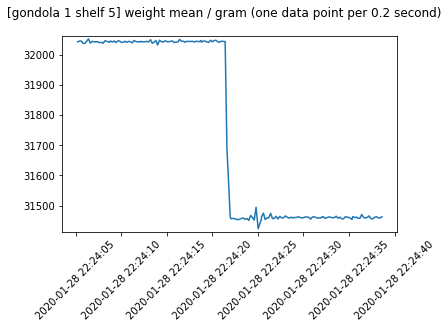

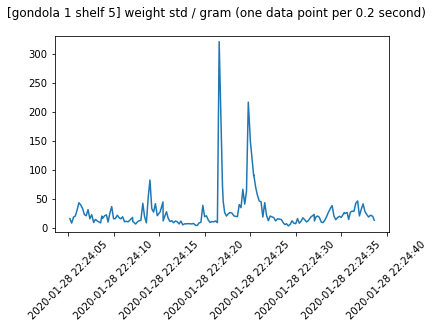

In [111]:
# plot average and variance based on data slot

def plot_data(data, date_time, title=None):
    assert len(data) == len(date_time)
#     print (data)
    fig = plt.figure()
    plt.subplots_adjust(bottom=0.2)
    plt.xticks( rotation=45 )
    ax=plt.gca()
    xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
    ax.xaxis.set_major_formatter(xfmt)
    ax.get_yaxis().get_major_formatter().set_useOffset(False)
#     print (min(data))
    ax.set_ylim([min(data)-10, max(data)+10])
    plt.plot(date_time,data)
    fig.suptitle(title)
    plt.show()
weight_mean,weight_std,timestamps,date_times = get_weights_per_shelf()
# print (weight_mean.shape)
# print (weight_std.shape)
# print (timestamps.shape)
# print (date_times.shape)

plot_gondola_id = 1
plot_shelf_id = 5
title = '[gondola %d shelf %d] weight mean / gram (one data point per 0.2 second)' % (plot_gondola_id, plot_shelf_id)
plot_data(weight_mean[plot_gondola_id-1][plot_shelf_id-1], date_times[plot_gondola_id-1], title)
title = '[gondola %d shelf %d] weight std / gram (one data point per 0.2 second)' % (plot_gondola_id, plot_shelf_id)
plot_data(weight_std[plot_gondola_id-1][plot_shelf_id-1], date_times[plot_gondola_id-1], title)

In [112]:
# detect events from weight trigger 

# return a list of events in the whole database, including the details of the events:
# trigger_begin, trigger_end, n_begin, n_end, delta_weight, gondola, shelf

# active state: use variance, i.e. when variance is larger than the given threshold
# valid active interval: based on how long the active state is, i.e. n(>threshold which is 1) continuous active time spots
# event trigger based on valid active interval: find start index and end index (currently use 2 time spots for both thresholds)
# of the n continuous active time spots, then find delta mean weight. 
# Trigger an event if the difference is large than a threshold


def detect_weight_events(weight_mean, weight_std, date_times, thresholds={'std': 40, 'mean': 10}):
    events = []
    num_gondola, num_shelf = weight_mean.shape
    num_times = len(date_times[0])
    for gondola_id in range(num_gondola):
        for shelf_id in range(num_shelf):
            var_is_active = np.array(weight_std[gondola_id][shelf_id]) > thresholds.get('std', 40)
            state_changes = np.diff(var_is_active)
            state_change_inds = [i for i, v in enumerate(state_changes) if v > 0]
            state_lengths = np.diff([0] + state_change_inds + [len(var_is_active) - 1])
            active_inds = [i for i in range(1, len(state_lengths), 2)]
            stable_inds = [i for i in range(2, len(state_lengths), 2)]
            valid_active_intervals = [i for i, ind in enumerate(active_inds) if state_lengths[ind] > thresholds.get('N_high', 1)]
            valid_stable_intervals = [i for i, ind in enumerate(stable_inds) if state_lengths[ind] > thresholds.get('N_low', 5)]
            min_next_active_interval = 0
            for active_idx in valid_active_intervals:
                if active_idx <= min_next_active_interval:
                    continue
                    
                stable_idx = -1
                for i in valid_stable_intervals:
                    if i >= active_idx:
                        stable_idx = i
                        break
                if stable_idx == -1:
                    break
                
                n_begin = state_change_inds[active_inds[active_idx] - 1] - thresholds.get('N_low', 5)
                n_end = state_change_inds[stable_inds[stable_idx] - 1] + 1 + thresholds.get('N_low', 5)
                w_begin = weight_mean[gondola_id][shelf_id][n_begin]
                w_end = weight_mean[gondola_id][shelf_id][n_end]
                delta_w = w_end - w_begin
                
                if abs(delta_w) > thresholds.get('mean', 10):
                    trigger_begin = date_times[gondola_id][n_begin]
                    trigger_end = date_times[gondola_id][n_end]
                    event = {'trigger_begin': trigger_begin,
                             'trigger_end': trigger_end,
                             'n_begin': n_begin,
                             'n_end': n_end,
                             'delta_weight': delta_w,
                             'gondola': gondola_id + 1,
                             'shelf': shelf_id + 1,
                            }
                    events.append(event)
                min_next_active_interval = stable_idx
    return events 

In [113]:
detect_weight_events(weight_mean, weight_std, date_times)

c:\python37\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater


[{'trigger_begin': datetime.datetime(2020, 1, 28, 22, 24, 20, 397000),
  'trigger_end': datetime.datetime(2020, 1, 28, 22, 24, 23, 208000),
  'n_begin': 76,
  'n_end': 90,
  'delta_weight': -592.1953,
  'gondola': 1,
  'shelf': 5},
 {'trigger_begin': datetime.datetime(2020, 1, 28, 22, 24, 9, 397000),
  'trigger_end': datetime.datetime(2020, 1, 28, 22, 24, 12, 613000),
  'n_begin': 21,
  'n_end': 37,
  'delta_weight': -10.1796875,
  'gondola': 1,
  'shelf': 6},
 {'trigger_begin': datetime.datetime(2020, 1, 28, 22, 24, 12, 107000),
  'trigger_end': datetime.datetime(2020, 1, 28, 22, 24, 16, 794000),
  'n_begin': 34,
  'n_end': 58,
  'delta_weight': 13.074219,
  'gondola': 1,
  'shelf': 6}]

In [ ]:
# add plates to returned event

In [114]:
def init_1D_array(dim):
    array = np.array( [None for i in range(dim) ],
                    dtype=object)
    for i in range(dim):
        array[i] = []
    return array

# [gondola, shelf, ts]
def init_2D_array(dim1, dim2):
    array = np.array( [ [None for j in range(dim2)] for i in range(dim1) ],
                    dtype=object)
    for i in range(dim1):
        for j in range(dim2):
            array[i][j] = []
    return array

# [gondola, shelf, plate_id, ts]
def init_3D_array(dim1, dim2, dim3):
    array = np.array( [ [ [None for k in range(dim3)] for j in range(dim2)] for i in range(dim1) ],
                    dtype=object)
    for i in range(dim1):
        for j in range(dim2):
            for k in range(dim3):
                array[i][j][k] = []
    return array


In [115]:
def get_weights(number_gondolas=5, number_shelves=6, number_plates=12,window_moving_avg=1):
    weight_plate_mean = init_3D_array(number_gondolas, number_shelves, number_plates)
    weight_plate_std = init_3D_array(number_gondolas, number_shelves, number_plates)
    weight_shelf_mean = init_2D_array(number_gondolas, number_shelves)
    weight_shelf_std = init_2D_array(number_gondolas, number_shelves)
    timestamps = init_1D_array(number_gondolas)
    date_times = init_1D_array(number_gondolas)
    plate_data = db['plate_data']
    
    for item in plate_data.find():
        gondola_id = item['gondola_id']
        plate_data_item = DocObjectCodec.decode(doc=item, collection='plate_data')
        date_time = item['date_time']
        timestamp = plate_data_item.timestamp # seconds since epoch
        np_plate = plate_data_item.data # [time,shelf,plate]
        np_plate = np_plate[:,1:13,1:13] # remove NaN elements
        
        # sum plates per shelf
        np_shelf = np_plate.sum(axis=2)      # [time,shelf]
        np_shelf = np_shelf.transpose()      # [shelf, time]
        np_plate = np_plate.transpose(1,2,0) # [shelf,plate,time]
        
        # get mean/std for weights per 12 data points (0.2 seconds)
        mean_plate = np.mean(np_plate, axis=2) # [shelf, plate]
        std_plate = np.std(np_plate, axis=2)   # [shelf, plate]
        mean_shelf = np.mean(np_shelf, axis=1) # [shelf]
        std_shelf = np.std(np_shelf, axis=1)   # [shelf]
        
        timestamps[gondola_id - 1].append(timestamp)
        date_times[gondola_id - 1].append(date_time)
        number_shelves = len(mean_shelf)
        for shelf_index in range(number_shelves):
            weight_shelf_mean[gondola_id - 1][shelf_index].append(mean_shelf[shelf_index])
            weight_shelf_std[gondola_id - 1][shelf_index].append(std_shelf[shelf_index])
            for plate_index in range(number_plates):
                weight_plate_mean[gondola_id - 1][shelf_index][plate_index].append(mean_plate[shelf_index][plate_index])
                weight_plate_std[gondola_id - 1][shelf_index][plate_index].append(std_plate[shelf_index][plate_index])
                
    return weight_plate_mean,weight_plate_std,weight_shelf_mean,weight_shelf_std,timestamps,date_times


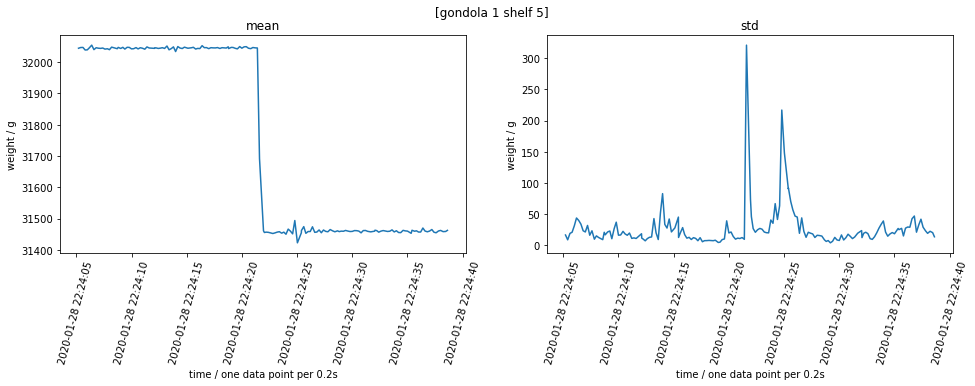

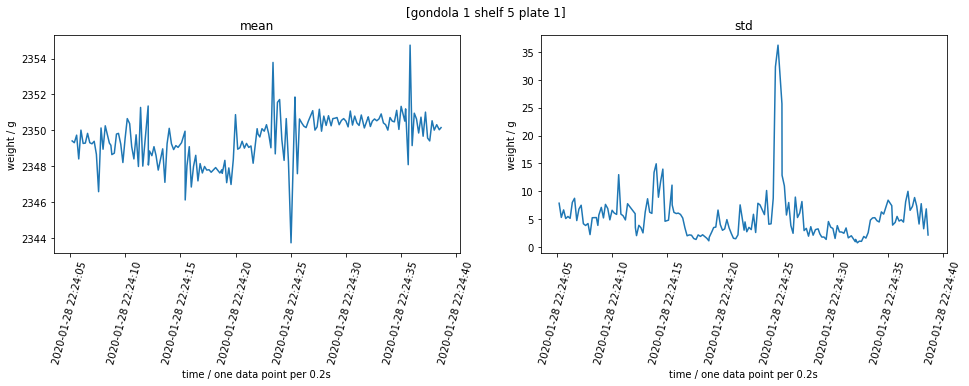

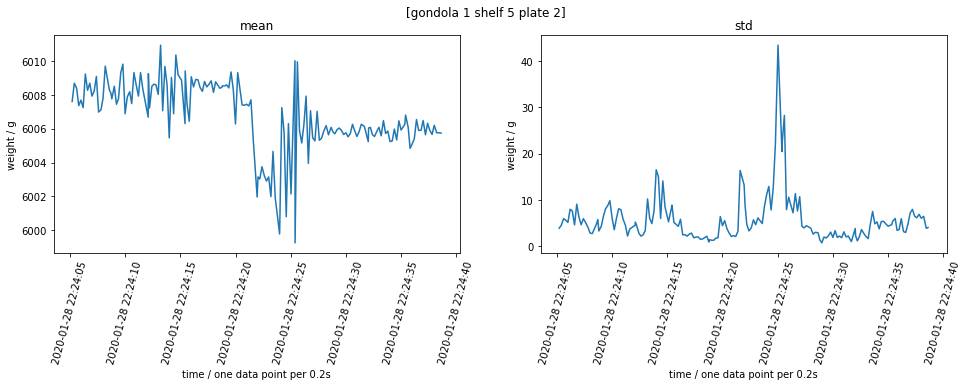

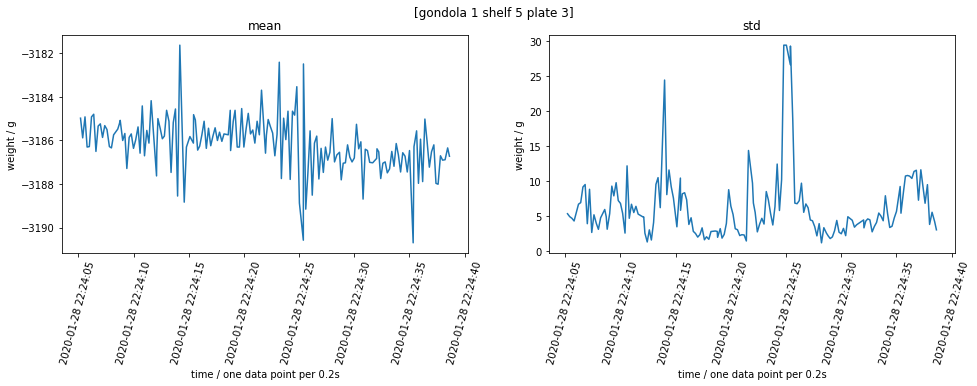

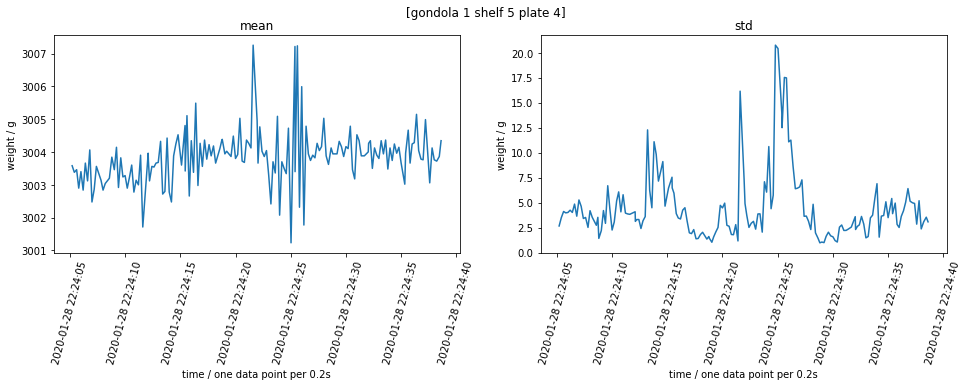

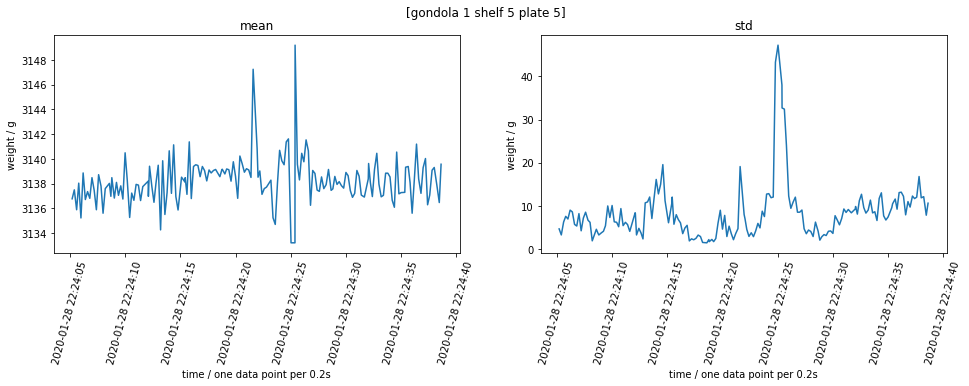

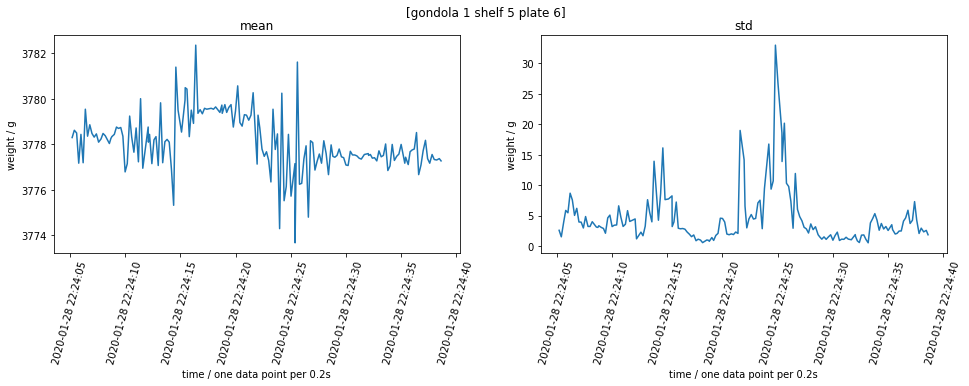

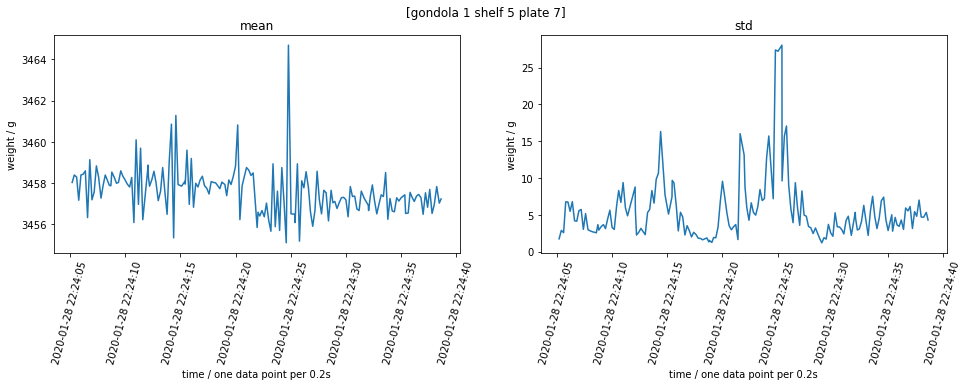

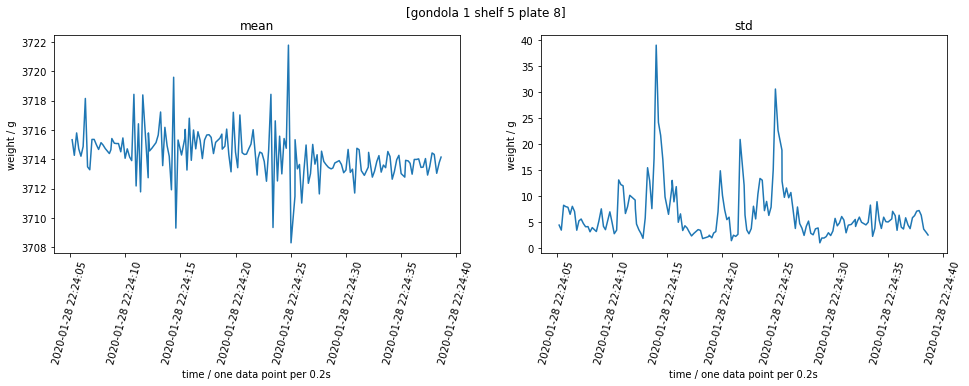

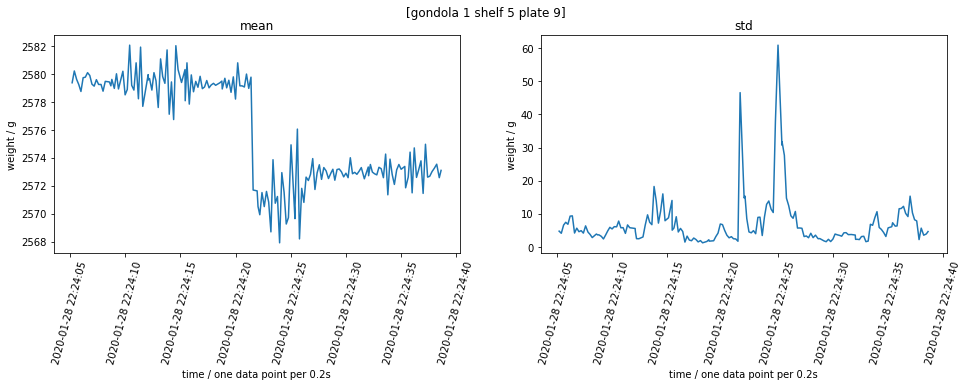

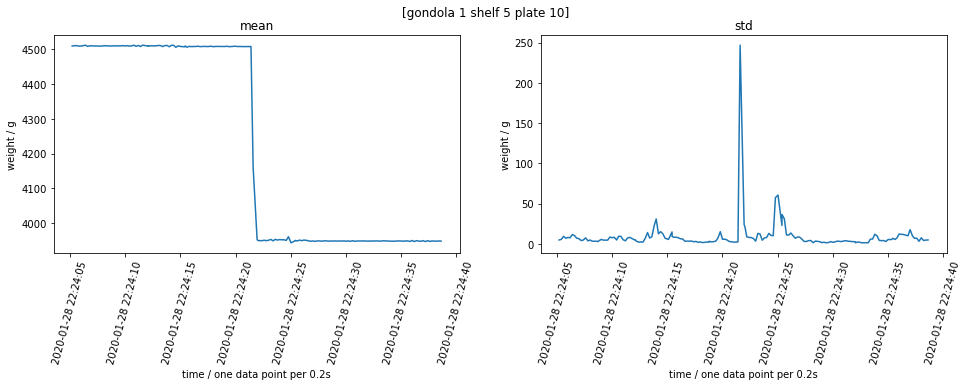

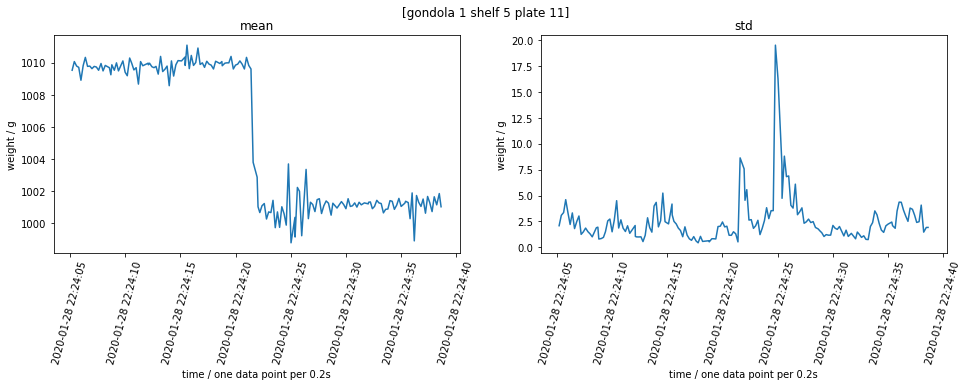

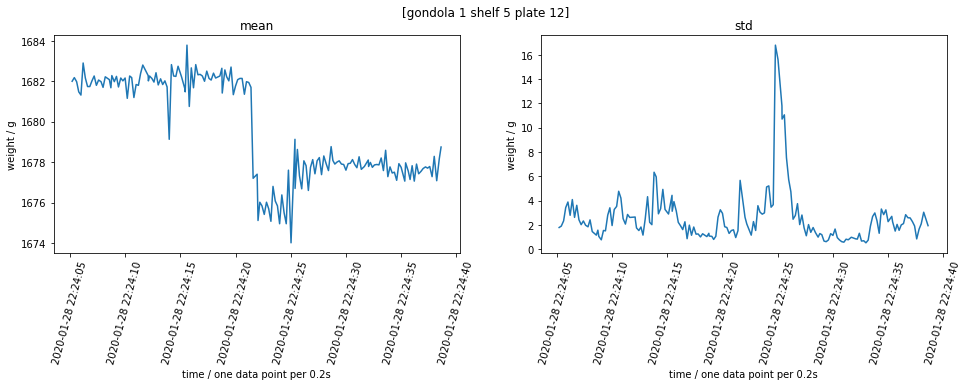

In [116]:
def plot_data2(mean, std, date_time, title=None):
    assert len(mean) == len(date_time)
    assert len(std) == len(date_time)

    
    fig = plt.figure(figsize=(16,4))
    fig.suptitle(title)
    
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ax1.title.set_text('mean')
    ax2.title.set_text('std')
    
    ax1.plot(date_time, mean)
    ax2.plot(date_time, std)
    
    for tick in ax1.get_xticklabels():
        tick.set_rotation(75)
    for tick in ax2.get_xticklabels():
        tick.set_rotation(75)
        
    xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
    ax1.xaxis.set_major_formatter(xfmt)
    ax1.get_yaxis().get_major_formatter().set_useOffset(False)
    ax2.xaxis.set_major_formatter(xfmt)
    ax2.get_yaxis().get_major_formatter().set_useOffset(False)
    
    ax1.set_ylabel('weight / g')
    ax1.set_xlabel('time / one data point per 0.2s')
    ax2.set_ylabel('weight / g')
    ax2.set_xlabel('time / one data point per 0.2s')
    
    plt.show()
    
weight_plate_mean,weight_plate_std,weight_shelf_mean,weight_shelf_std,timestamps,date_times = get_weights()
# print (weight_plate_mean.shape)
# print (weight_plate_std.shape)
# print (weight_shelf_mean.shape)
# print (weight_shelf_std.shape)
# print (timestamps.shape)
# print (date_times.shape)

# take water
plot_gondola_id = 1
plot_shelf_id = 5
plot_plate_ids = [1,2,3,4,5,6,7,8,9,10,11,12]

# take chip
# plot_gondola_id = 2
# plot_shelf_id = 5
# plot_plate_ids = [1,2,3,4,5,6,7,8,9,10,11,12]

title = '[gondola %d shelf %d]' % (plot_gondola_id, plot_shelf_id)
plot_data2(weight_shelf_mean[plot_gondola_id-1][plot_shelf_id-1],
          weight_shelf_std[plot_gondola_id-1][plot_shelf_id-1], 
          date_times[plot_gondola_id-1], 
          title)


for plot_plate_id in plot_plate_ids:
    title = '[gondola %d shelf %d plate %d]' % (plot_gondola_id, plot_shelf_id, plot_plate_id)
    plot_data2(weight_plate_mean[plot_gondola_id-1][plot_shelf_id-1][plot_plate_id-1],
              weight_plate_std[plot_gondola_id-1][plot_shelf_id-1][plot_plate_id-1], 
              date_times[plot_gondola_id-1], 
              title)


In [117]:
# detect events from weight trigger 

# return a list of events in the whole database, including the details of the events:
# trigger_begin, trigger_end, n_begin, n_end, delta_weight, gondola, shelf, plates

# active state: use variance, i.e. when variance is larger than the given threshold
# valid active interval: based on how long the active state is, i.e. n(>threshold which is 1) continuous active time spots
# event trigger based on valid active interval: find start index and end index (currently use 2 time spots for both thresholds)
# of the n continuous active time spots, then find delta mean weight. 
# Trigger an event if the difference is large than a threshold


def detect_weight_events(weight_shelf_mean, 
                         weight_shelf_std, 
                         weight_plate_mean, 
                         weight_plate_std, 
                         date_times, 
                         number_plates=12, 
                         thresholds={'std_shelf': 40, 'mean_shelf': 10}):
    events = []
    num_gondola, num_shelf = weight_shelf_mean.shape
    num_times = len(date_times[0])
    for gondola_id in range(num_gondola):
        for shelf_id in range(num_shelf):
            var_is_active = np.array(weight_shelf_std[gondola_id][shelf_id]) > thresholds.get('std_shelf', 40)
            state_changes = np.diff(var_is_active)
            state_change_inds = [i for i, v in enumerate(state_changes) if v > 0]
            state_lengths = np.diff([0] + state_change_inds + [len(var_is_active) - 1])
            active_inds = [i for i in range(1, len(state_lengths), 2)]
            stable_inds = [i for i in range(2, len(state_lengths), 2)]
            valid_active_intervals = [i for i, ind in enumerate(active_inds) if state_lengths[ind] > thresholds.get('N_high', 1)]
            valid_stable_intervals = [i for i, ind in enumerate(stable_inds) if state_lengths[ind] > thresholds.get('N_low', 5)]
            min_next_active_interval = 0
            for active_idx in valid_active_intervals:
                if active_idx <= min_next_active_interval:
                    continue
                    
                stable_idx = -1
                for i in valid_stable_intervals:
                    if i >= active_idx:
                        stable_idx = i
                        break
                if stable_idx == -1:
                    break
                
                n_begin = state_change_inds[active_inds[active_idx] - 1] - thresholds.get('N_low', 5)
                n_end = state_change_inds[stable_inds[stable_idx] - 1] + 1 + thresholds.get('N_low', 5)
                w_begin = weight_shelf_mean[gondola_id][shelf_id][n_begin]
                w_end = weight_shelf_mean[gondola_id][shelf_id][n_end]
                delta_w = w_end - w_begin
                
                if abs(delta_w) > thresholds.get('mean_shelf', 10):
                    trigger_begin = date_times[gondola_id][n_begin]
                    trigger_end = date_times[gondola_id][n_end]
                    
                    plates = [0] * number_plates
                    for plate_id in range(number_plates):
                        
                        plates[plate_id] = int(abs(weight_plate_mean[gondola_id][shelf_id][plate_id][n_end] 
                                                   - weight_plate_mean[gondola_id][shelf_id][plate_id][n_begin]) 
                                               > thresholds.get('mean_plate', 5))
                    
                    
                    event = {'trigger_begin': trigger_begin,
                             'trigger_end': trigger_end,
                             'n_begin': n_begin,
                             'n_end': n_end,
                             'delta_weight': delta_w,
                             'gondola': gondola_id + 1,
                             'shelf': shelf_id + 1,
                             'plates': plates, 
                            }
                    events.append(event)
                min_next_active_interval = stable_idx
    return events 


In [118]:
 detect_weight_events(weight_shelf_mean, weight_shelf_std, weight_plate_mean, weight_plate_std, date_times)

c:\python37\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater


[{'trigger_begin': datetime.datetime(2020, 1, 28, 22, 24, 20, 397000),
  'trigger_end': datetime.datetime(2020, 1, 28, 22, 24, 23, 208000),
  'n_begin': 76,
  'n_end': 90,
  'delta_weight': -592.1953,
  'gondola': 1,
  'shelf': 5,
  'plates': [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]},
 {'trigger_begin': datetime.datetime(2020, 1, 28, 22, 24, 9, 397000),
  'trigger_end': datetime.datetime(2020, 1, 28, 22, 24, 12, 613000),
  'n_begin': 21,
  'n_end': 37,
  'delta_weight': -10.1796875,
  'gondola': 1,
  'shelf': 6,
  'plates': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
 {'trigger_begin': datetime.datetime(2020, 1, 28, 22, 24, 12, 107000),
  'trigger_end': datetime.datetime(2020, 1, 28, 22, 24, 16, 794000),
  'n_begin': 34,
  'n_end': 58,
  'delta_weight': 13.074219,
  'gondola': 1,
  'shelf': 6,
  'plates': [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]}]

In [119]:
# sliding window detect events
# concentacate the data set , and use sliding window (60 data points per window)
# moving average weight, can remove noise and reduce the false trigger caused by shake or unstable during an event


In [120]:
def get_agg_weight(number_gondolas=5):
    plate_data = db['plate_data']
    agg_plate_data = [None] * number_gondolas
    agg_shelf_data = [None] * number_gondolas
    timestamps = init_1D_array(number_gondolas)
    date_times = init_1D_array(number_gondolas)

    for item in plate_data.find():
        gondola_id = item['gondola_id']
        plate_data_item = DocObjectCodec.decode(doc=item, collection='plate_data')
        date_time = item['date_time']
        timestamp = plate_data_item.timestamp # seconds since epoch
        np_plate = plate_data_item.data # [time,shelf,plate]
        np_plate = np_plate[:,1:13,1:13] # remove NaN elements
        np_shelf = np_plate.sum(axis=2)      # [time,shelf]
        np_shelf = np_shelf.transpose()      # [shelf, time]
        np_plate = np_plate.transpose(1,2,0) # [shelf,plate,time]
        if agg_plate_data[gondola_id-1] is not None:
            agg_plate_data[gondola_id-1] = np.append(agg_plate_data[gondola_id-1], np_plate, axis=2)
            agg_shelf_data[gondola_id-1] = np.append(agg_shelf_data[gondola_id-1], np_shelf, axis=1)
        else:
            agg_plate_data[gondola_id-1] = np_plate
            agg_shelf_data[gondola_id-1] = np_shelf
            
        timestamps[gondola_id - 1].append(timestamp)
        date_times[gondola_id - 1].append(date_time)
        
    return agg_plate_data, agg_shelf_data

agg_plate_data, agg_shelf_data = get_agg_weight()

In [121]:
def rolling_window(a, window):
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

In [122]:
def get_agg_date_times(date_times, number_gondolas=5):
    agg_date_times = init_1D_array(number_gondolas)
    for gondola_id in range(number_gondolas):
        for i, date_time in enumerate(date_times[gondola_id]):
            if i < len(date_times[gondola_id]) - 1:
                next_date_time = date_times[gondola_id][i+1]
                time_delta = (next_date_time - date_time) / 12
            agg_date_times[gondola_id] += [date_time + time_delta * j for j in range(0, 12)]
    return agg_date_times
agg_date_times = get_agg_date_times(date_times, 5)

In [123]:
def get_moving_weight(num_gondola=5, window_size=60):
    moving_weight_plate_mean = []
    moving_weight_plate_std = []
    moving_weight_shelf_mean = []
    moving_weight_shelf_std = []
    for gondola_id in range(5):
        moving_weight_shelf_mean.append(np.mean(rolling_window(agg_shelf_data[gondola_id], window_size), -1))
        moving_weight_shelf_std.append(np.std(rolling_window(agg_shelf_data[gondola_id], window_size), -1))
        moving_weight_plate_mean.append(np.mean(rolling_window(agg_plate_data[gondola_id], window_size), -1))
        moving_weight_plate_std.append(np.std(rolling_window(agg_plate_data[gondola_id], window_size), -1))
    return moving_weight_shelf_mean, moving_weight_shelf_std, moving_weight_plate_mean, moving_weight_plate_std
moving_weight_shelf_mean, moving_weight_shelf_std, moving_weight_plate_mean, moving_weight_plate_std = get_moving_weight(5, 60)

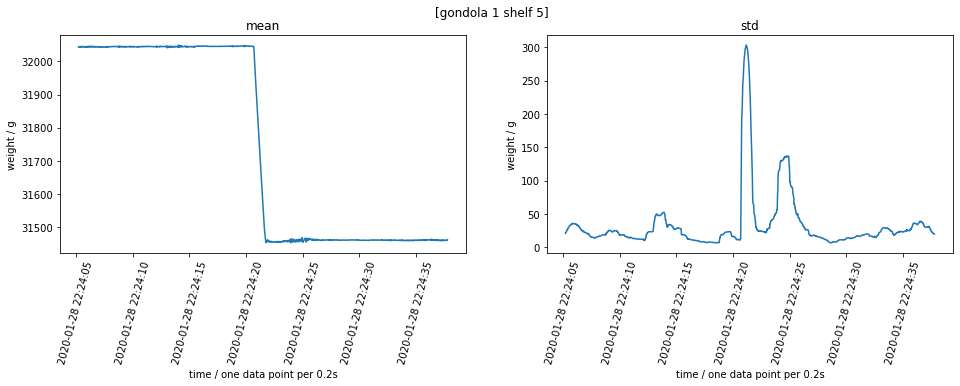

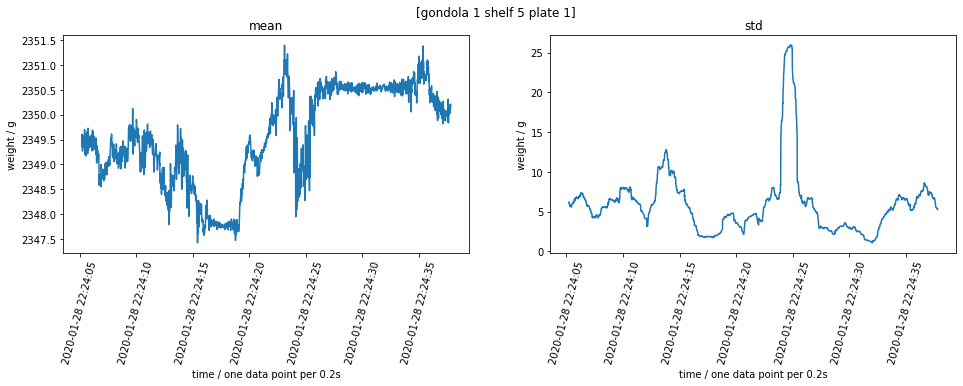

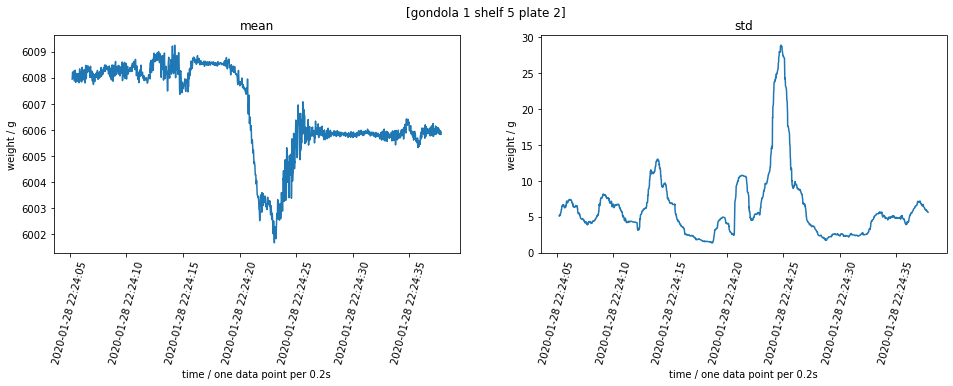

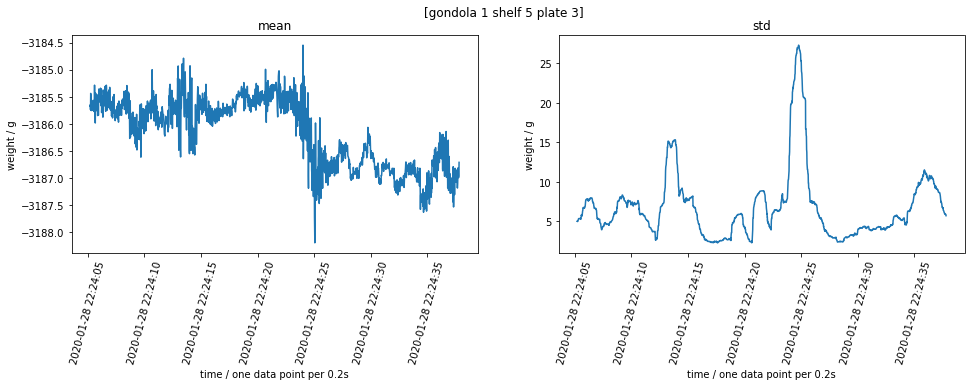

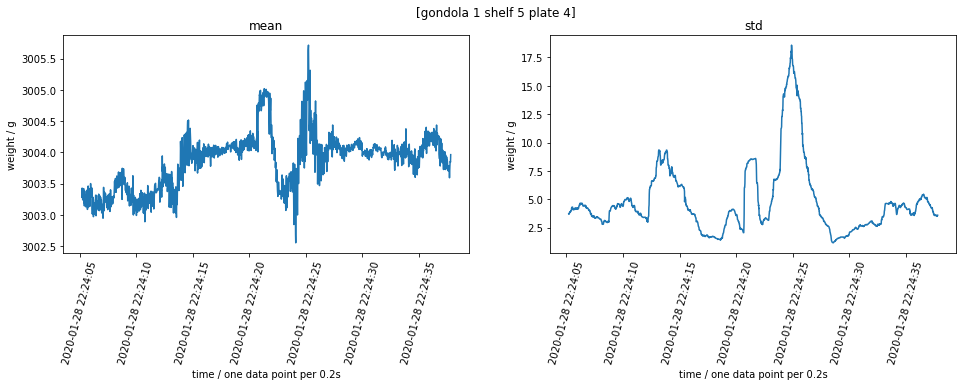

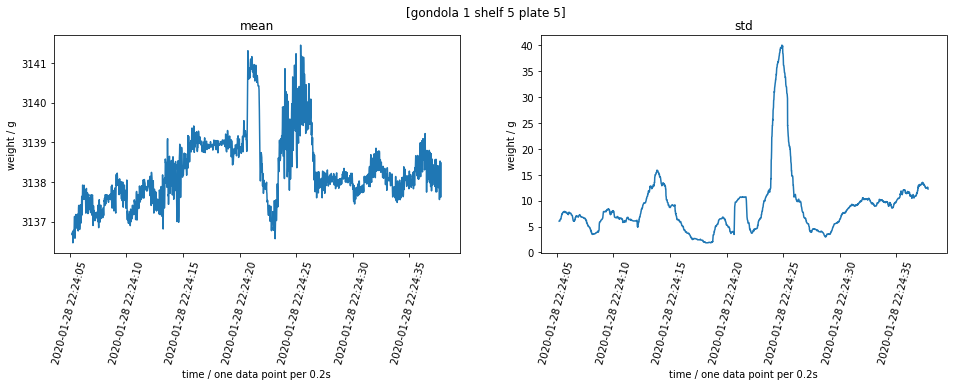

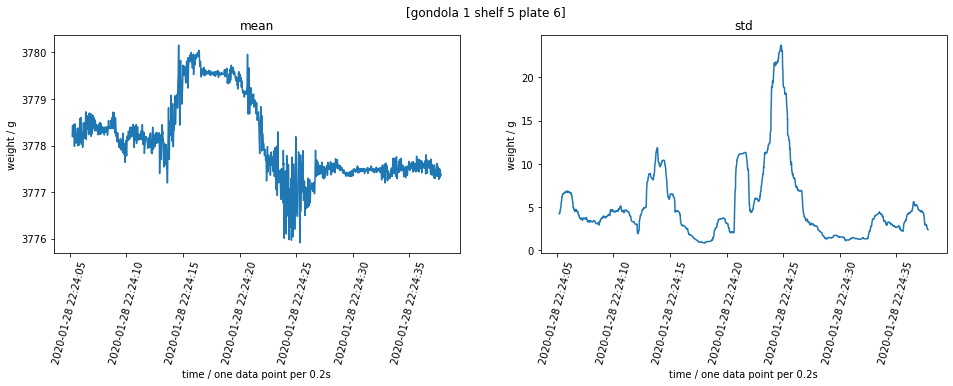

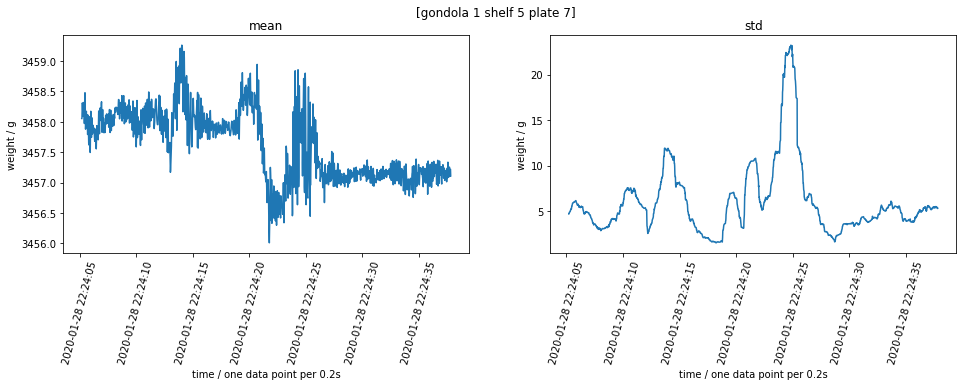

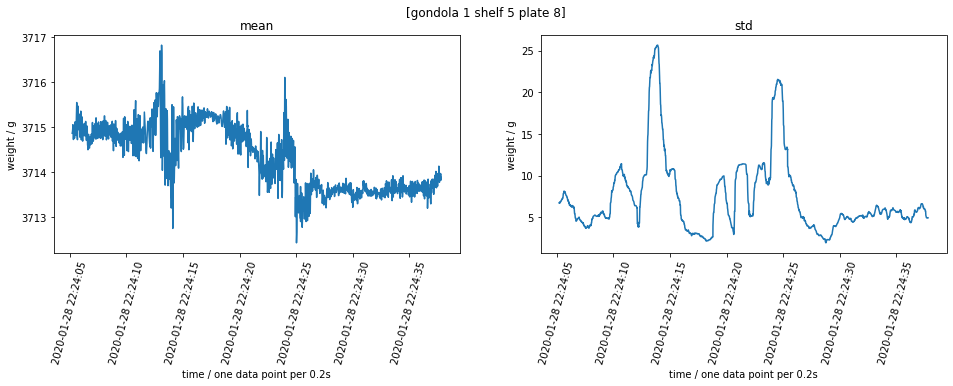

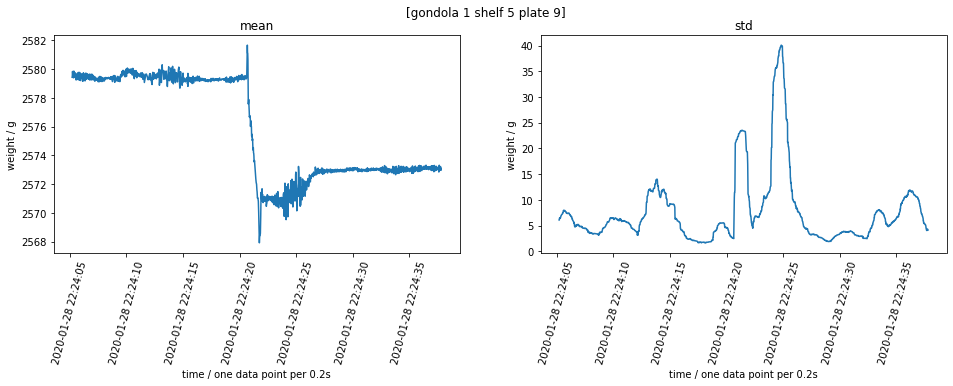

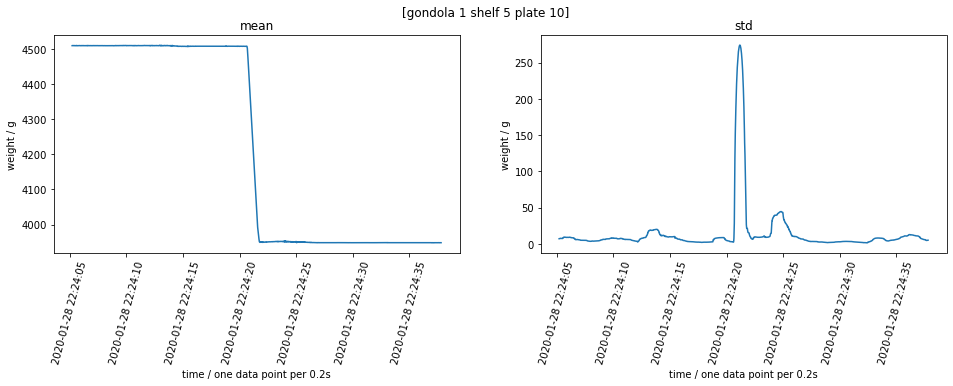

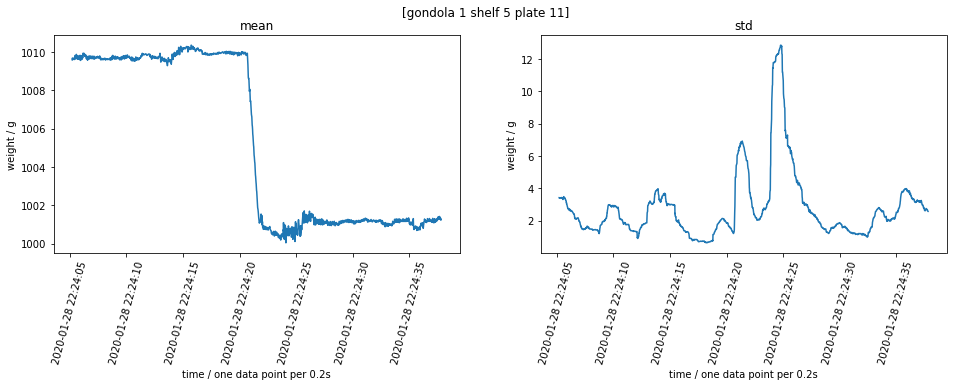

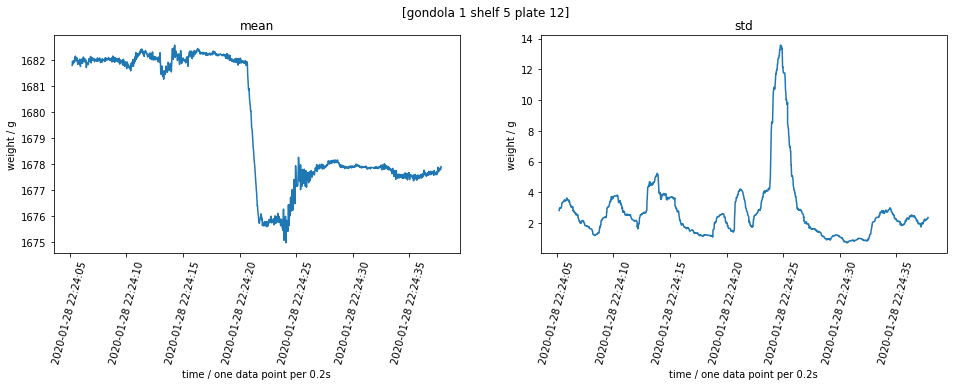

In [124]:
# take water
plot_gondola_id = 1
plot_shelf_id = 5
plot_plate_ids = [1,2,3,4,5,6,7,8,9,10,11,12]

# take chip
# plot_gondola_id = 2
# plot_shelf_id = 5
# plot_plate_ids = [1,2,3,4,5,6,7,8,9,10,11,12]

title = '[gondola %d shelf %d]' % (plot_gondola_id, plot_shelf_id)
plot_data2(moving_weight_shelf_mean[plot_gondola_id-1][plot_shelf_id-1],
          moving_weight_shelf_std[plot_gondola_id-1][plot_shelf_id-1], 
          agg_date_times[plot_gondola_id-1][:-59], 
          title)


for plot_plate_id in plot_plate_ids:
    title = '[gondola %d shelf %d plate %d]' % (plot_gondola_id, plot_shelf_id, plot_plate_id)
    plot_data2(moving_weight_plate_mean[plot_gondola_id-1][plot_shelf_id-1][plot_plate_id-1],
              moving_weight_plate_std[plot_gondola_id-1][plot_shelf_id-1][plot_plate_id-1], 
              agg_date_times[plot_gondola_id-1][:-59],
              title)

In [125]:

def detect_weight_events(weight_shelf_mean, 
                         weight_shelf_std, 
                         weight_plate_mean, 
                         weight_plate_std, 
                         date_times, 
                         num_plate=12, 
                         thresholds={'std_shelf': 40, 'mean_shelf': 10}):
    events = []
    num_gondola = len(weight_shelf_mean)
    num_times = len(date_times[0])
    for gondola_id in range(num_gondola):
        num_shelf = weight_shelf_mean[gondola_id].shape[0]
        for shelf_id in range(num_shelf):
            var_is_active = np.array(weight_shelf_std[gondola_id][shelf_id]) > thresholds.get('std_shelf', 40)
            state_changes = np.diff(var_is_active)
            state_change_inds = [i for i, v in enumerate(state_changes) if v > 0]
            state_lengths = np.diff([0] + state_change_inds + [len(var_is_active) - 1])
            active_inds = [i for i in range(1, len(state_lengths), 2)]
            stable_inds = [i for i in range(2, len(state_lengths), 2)]
            valid_active_intervals = [i for i, ind in enumerate(active_inds) if state_lengths[ind] > thresholds.get('N_high', 1)]
            valid_stable_intervals = [i for i, ind in enumerate(stable_inds) if state_lengths[ind] > thresholds.get('N_low', 5)]
            min_next_active_interval = 0
            for active_idx in valid_active_intervals:
                if active_idx <= min_next_active_interval:
                    continue
                    
                stable_idx = -1
                for i in valid_stable_intervals:
                    if i >= active_idx:
                        stable_idx = i
                        break
                if stable_idx == -1:
                    break
                
                n_begin = state_change_inds[active_inds[active_idx] - 1] - thresholds.get('N_low', 5)
                n_end = state_change_inds[stable_inds[stable_idx] - 1] + 1 + thresholds.get('N_low', 5)
                w_begin = weight_shelf_mean[gondola_id][shelf_id][n_begin]
                w_end = weight_shelf_mean[gondola_id][shelf_id][n_end]
                delta_w = w_end - w_begin
                
                if abs(delta_w) > thresholds.get('mean_shelf', 10):
                    trigger_begin = date_times[gondola_id][n_begin]
                    trigger_end = date_times[gondola_id][n_end]
                    
                    plates = [0] * num_plate
                    for plate_id in range(num_plate):
                        
                        plates[plate_id] = int(abs(weight_plate_mean[gondola_id][shelf_id][plate_id][n_end] 
                                                   - weight_plate_mean[gondola_id][shelf_id][plate_id][n_begin]) 
                                               > thresholds.get('mean_plate', 5))
                    
                    
                    event = {'trigger_begin': trigger_begin,
                             'trigger_end': trigger_end,
                             'n_begin': n_begin,
                             'n_end': n_end,
                             'delta_weight': delta_w,
                             'gondola': gondola_id + 1,
                             'shelf': shelf_id + 1,
                             'plates': plates, 
                            }
                    events.append(event)
                min_next_active_interval = stable_idx
    return events 

In [126]:
detect_weight_events(moving_weight_shelf_mean, 
                     moving_weight_shelf_std, 
                     moving_weight_plate_mean, 
                     moving_weight_plate_std, 
                     agg_date_times)

c:\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


[{'trigger_begin': datetime.datetime(2020, 1, 28, 22, 24, 20, 599000),
  'trigger_end': datetime.datetime(2020, 1, 28, 22, 24, 22, 13000),
  'n_begin': 924,
  'n_end': 1004,
  'delta_weight': -588.9922,
  'gondola': 1,
  'shelf': 5,
  'plates': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]}]